### Markowitz portfolio selection

El principio central es que la diversificación es siempre deseable y debe ser implicada por cualquier estrategia de construcción de portfolios

     
    Diversification is both observed and sensible; a rule of behavior which does not imply the superiority of diversification must be rejected both as a hypothesis and as a maxim.

Por ello no podemos simplemente emplear una estrategia que descuenta el riesgo de los beneficios esperados de cada inversión, recomendando maximizar este valor.
Con esta estrategia deberíamos poner siempre nuestro dinero en el caballo más rápido. No prefiere necesariamente portfolios diversificados. 

Beneficio y varianza deben considerarse por separado. Por ello propone una regla doble: E-V rule. Que nos indica minimizar la varianza para un determinado beneficio y viceversa.

Esta regla nos permite descatar varios portfolios como ineficientes, ofreciéndo una curva de beneficio-riesgo que corresponde a las combinaciones eficientes. 

In [266]:
#creemos una distribución aleatoria de precios
import numpy as np

#Vamos a imaginar que los posibles precios futuros de un activo vienen dados por este array
#y que todos son equiprobables
p1 = np.random.rand(10)*10
p2 = np.random.rand(10)*4
p3 = np.random.rand(10)*7
print(f"""beneficio esperado act1 : {p1.mean():.5} EUR, varianza {p1.var(ddof=1):.5} EUR^2
beneficio esperado act2 : {p2.mean():.5} EUR, varianza {p2.var(ddof=1):.5} EUR^2
beneficio esperado act3 : {p3.mean():.5} EUR, varianza {p3.var(ddof=1):.5} EUR^2""")


beneficio esperado act1 : 7.2654 EUR, varianza 6.5194 EUR^2
beneficio esperado act2 : 1.6299 EUR, varianza 1.5995 EUR^2
beneficio esperado act3 : 3.4705 EUR, varianza 3.9617 EUR^2


In [184]:
#Mi portfolio se podrá considerar como una combinación lineal de estos activos.
#Si invierto la misma cantidad en cada uno:
portfolio = 1/3*p1 + 1/3*p2 + 1/3*p3

In [268]:
#el beneficio esperado de mi portfolio y la varianza esperada serían:
portfolio.mean(), portfolio.var(ddof=1)

(3.794510110157224, 1.851579483942045)

Mientras el beneficio esperado es la simple combinación lineal de los beneficios esperados de los activos. Para comprender la varianza total del portfolio ha de tenerse en cuenta la covarianza de los activos.

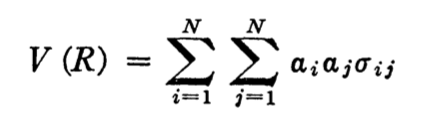


Aquí se nota la ventaja de diversificar. La varianza resultante es mucho menor que la suma de las varianzas individuales ponderadas. 

Diversificar conserva el beneficio y reduce el riesgo.

In [237]:
from statistics import covariance,variance,mean

def portfolio_variance(weights):
    var = 0
    for i,wi in zip([p1,p2,p3],weights):
        for j,wj in zip([p1,p2,p3],weights):
            var += wi*wj*covariance(i,j)
    return var

portfolio_expected = lambda w :  sum([mean(i*wi) for i,wi in zip([p1,p2,p3],w)]) 

#portfolio_expected(0.5,0.5), 
portfolio_variance([1/3, 1/3, 1/3]),portfolio_expected([1/3, 1/3, 1/3])


(1.3525542093544565, 3.379291541374921)

In [269]:
###Generamos todas las combinaciones posibles de portfolios
from itertools import product
#generamos todas las combinaciones y filtramos las que no suman uno
x = np.arange(0,1.1,0.01)
p = list(filter(lambda x: sum(x) == 1,product(x,x,x)))

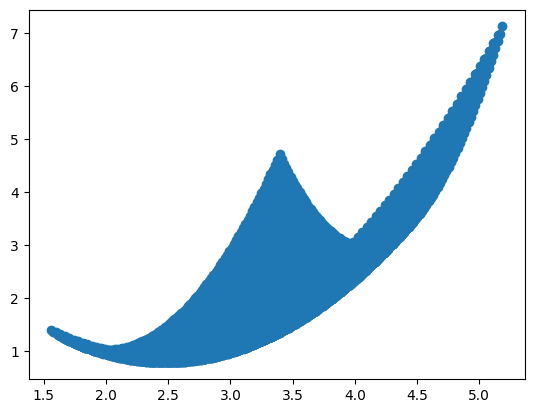

In [265]:
##Elegir la combinación del portfolio es en este caso un problema de optimización
##Veamos como responde la combinación de varianza y expectativa 
exp = [portfolio_expected(i) for i in p]
var = [portfolio_variance(i) for i in p]

from matplotlib.pyplot import  scatter

scatter(exp,var)

Los portfolios deseables, son aquellos que están en el límite inferior de la figura en dirección ascendente: tienen la mínima varianza para el mismo beneficio